Resume-style (achievement-oriented):

"Cleaned and analyzed sales data with pandas to highlight top states, regions, and products by sales and order totals; created plots and exported findings to Excel and PNG for reporting."

###Project-style (step-by-step):

"Wrangled a sales dataset to identify top states and regions by sales and order totals. Grouped data by product to calculate units sold and total revenue. Built and saved plots as PNGs, and exported the cleaned dataset to Excel for reporting."

Load and initial exploration

In [219]:
import pandas as pd
import openpyxl
import numpy as np

In [220]:
file_path = "C:/Users/Ricki/.cache/kagglehub/datasets/indiella/store-sales-json/versions/1/StoreSales.json"
df =pd.read_json(file_path)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.0f}'.format
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,310",7,0,762,934,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709",9,0,-289,924,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175",9,0,920,915,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless","2,893",5,0,-97,910,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,833",8,0,312,903,Critical


Dropped unecessary rows

In [221]:
new = df[['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Region', 
          'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Shipping Cost']] 


In [222]:
new = new.copy()
new.replace(['NaN','nan',''], np.nan, inplace=True)
new.dropna(how='all', inplace=True)


In [223]:
new.head()

,Row ID,Order ID,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost
0,32298,CA-2012-124891,RH-19495,Rick Hansen,Consumer,New York City,New York,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,310",7,0,934
1,26341,IN-2013-77878,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709",9,0,924
2,25330,IN-2013-71249,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175",9,0,915
3,13524,ES-2013-1579342,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless","2,893",5,0,910
4,47221,SG-2013-4320,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,833",8,0,903


In [206]:
new.isnull().sum()

Row ID           0
Order ID         0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Shipping Cost    0
dtype: int64

Grouped by State to show Top State by Sales Total and Total Orders

In [241]:
summary = df.groupby('State').agg({'Sales':'sum', 'Order ID':'count'}).rename(columns={'Order ID':'Orders'})
top_state = summary.sort_values(by=['Sales', 'Orders'], ascending=False)
top_state

,Sales,Orders
State,,
England,"485,171",1499
California,"457,688",2001
Ile-de-France,"317,823",981
New York,"310,876",1128
New South Wales,"270,487",781
...,...,...
Pernik,15,1
Manicaland,12,2
Bitola,11,1


Grouped by Region to show Top Region by Sales Total and Total Orders

In [242]:
summary2 = df.groupby('Region').agg({'Sales':'sum', 'Order ID':'count'}).rename(columns={'Order ID':'Orders'})
top_region = summary2.sort_values(by=['Sales', 'Orders'], ascending=False)
top_region

,Sales,Orders
Region,,
Central,"2,822,303",11117
South,"1,600,907",6645
North,"1,248,166",4785
Oceania,"1,100,185",3487
Southeast Asia,"884,423",3129
North Asia,"848,310",2338
EMEA,"806,161",5029
Africa,"783,773",4587
Central Asia,"752,827",2048


Created a plot for easy viewing:
Top States by Sales, Top States by Order Total, Top Region by Sales, Top Region by Order Total
    Saved plots to png

In [249]:
top5_states_orders = top5_state['Orders']  
top5_regions_orders = top5_region['Orders']  

In [253]:
top5_states_sales = top5_state['Sales']  
top5_regions_sales = top5_region['Sales']  

<Axes: title={'center': 'Top 5 States by Sales'}, xlabel='State', ylabel='Sales'>

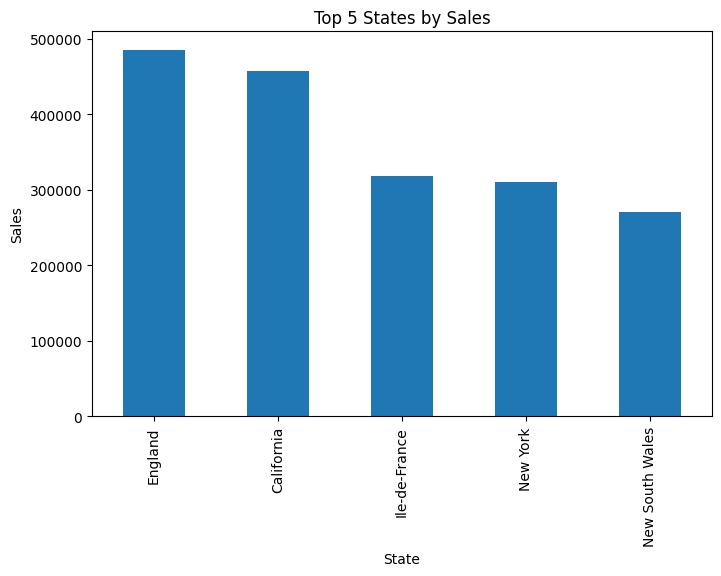

In [256]:
ax3 = top5_states_sales.plot(kind='bar', figsize=(8,5), title='Top 5 States by Sales', ylabel='Sales')
fig = ax.get_figure()
fig.savefig("top5_statesales_chart.png")
ax3

<Axes: title={'center': 'Top 5 Regions by Sales'}, xlabel='Region', ylabel='Sales'>

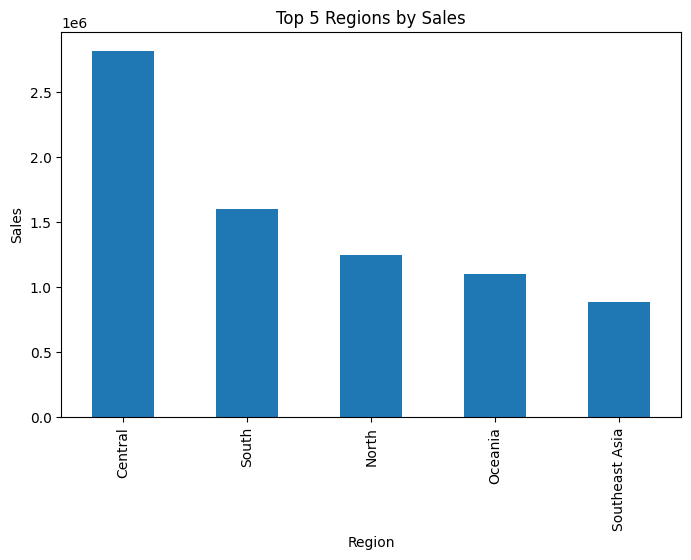

In [255]:
# Top 5 regions by sales
ax2 = top5_regions_sales.plot(kind='bar', figsize=(8,5), title='Top 5 Regions by Sales', ylabel='Sales')
fig = ax.get_figure()
fig.savefig("top5_regionsales_chart.png")
ax2

<Axes: title={'center': 'Top 5 States by Orders'}, xlabel='State', ylabel='Orders'>

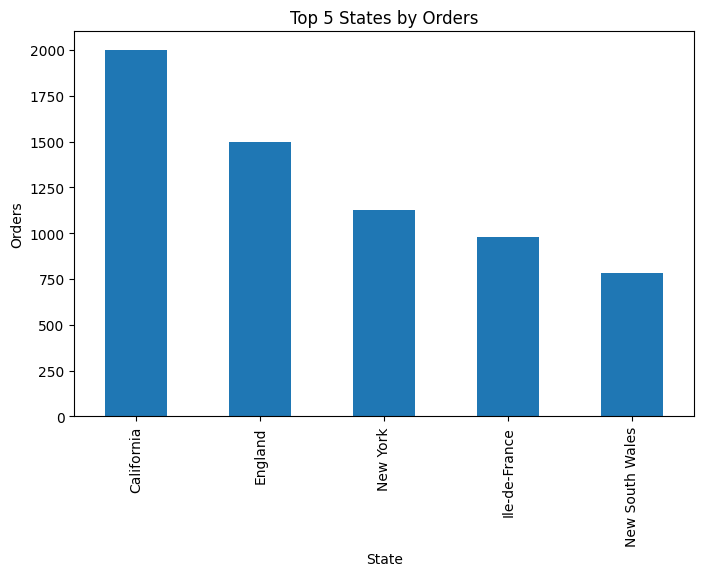

In [260]:
ax1 = top5_states_orders.sort_values(ascending = False).plot(kind='bar', figsize=(8,5), title='Top 5 States by Orders', ylabel='Orders')
fig = ax.get_figure()
fig.savefig("top5_statesorders_chart.png")
ax1

<Axes: title={'center': 'Top 5 Regions by Orders'}, xlabel='Region', ylabel='Orders'>

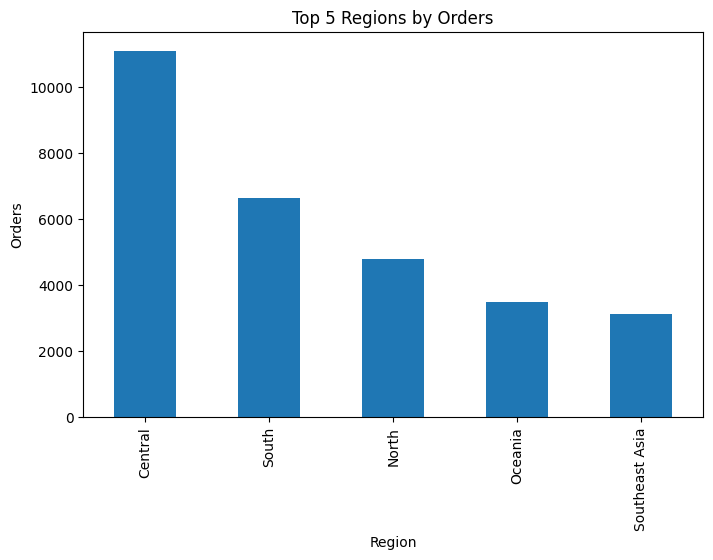

In [261]:
ax = top5_regions_orders.plot(kind='bar', figsize=(8,5), title='Top 5 Regions by Orders', ylabel='Orders')
fig = ax.get_figure()
fig.savefig("top5_regionorders_chart.png")
ax

Grouped by Product Name to find Product Amount sold and Total Sales per Product Name

In [299]:
product_sold = new.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

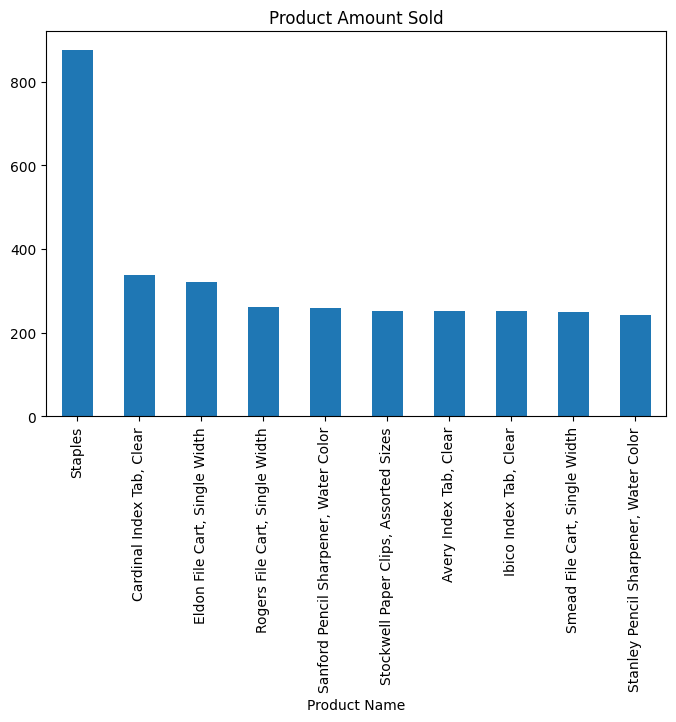

In [305]:
bx = product_sold.head(10).plot(kind='bar', figsize=(8,5), title='Product Amount Sold')
fig = bx.get_figure()
fig.savefig('Product_Amount_Sold.png')


In [301]:
product_sales= new.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

<Axes: title={'center': 'Product Sales'}, xlabel='Product Name'>

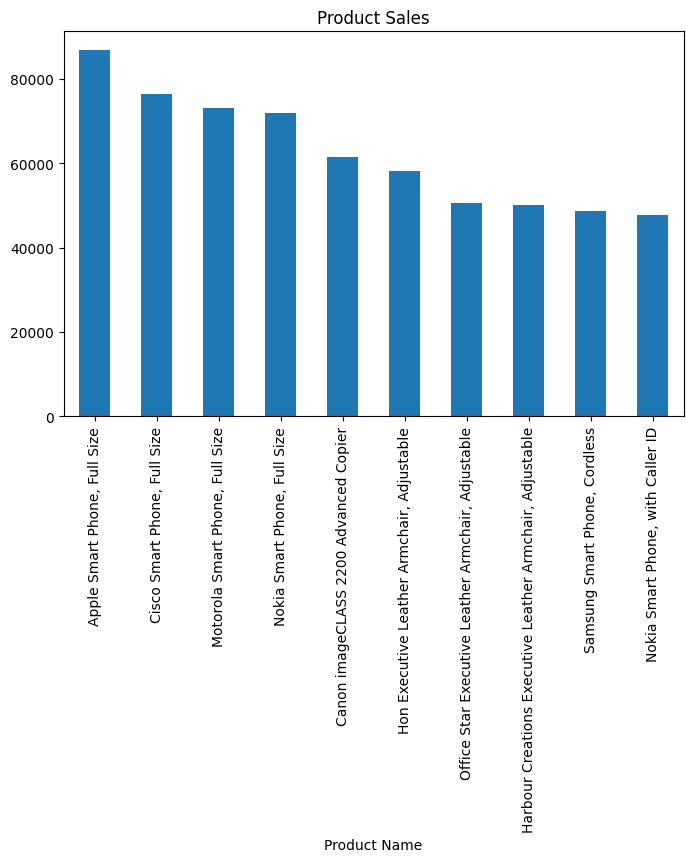

In [302]:
bx1 = product_sales.head(10).plot(kind='bar', figsize=(8,5), title='Product Sales')
fig = bx1.get_figure()
fig.savefig('Product_Sales.png')

In [308]:
new.to_excel('Sales_info.xlsx', index=False)